In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
dataset = pd.read_csv('Mall_Customers.csv')

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
dataset.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
# Creating input parameter array

X = dataset[['Annual Income (k$)','Spending Score (1-100)']].values

Text(0, 0.5, 'Euclidian Distance')

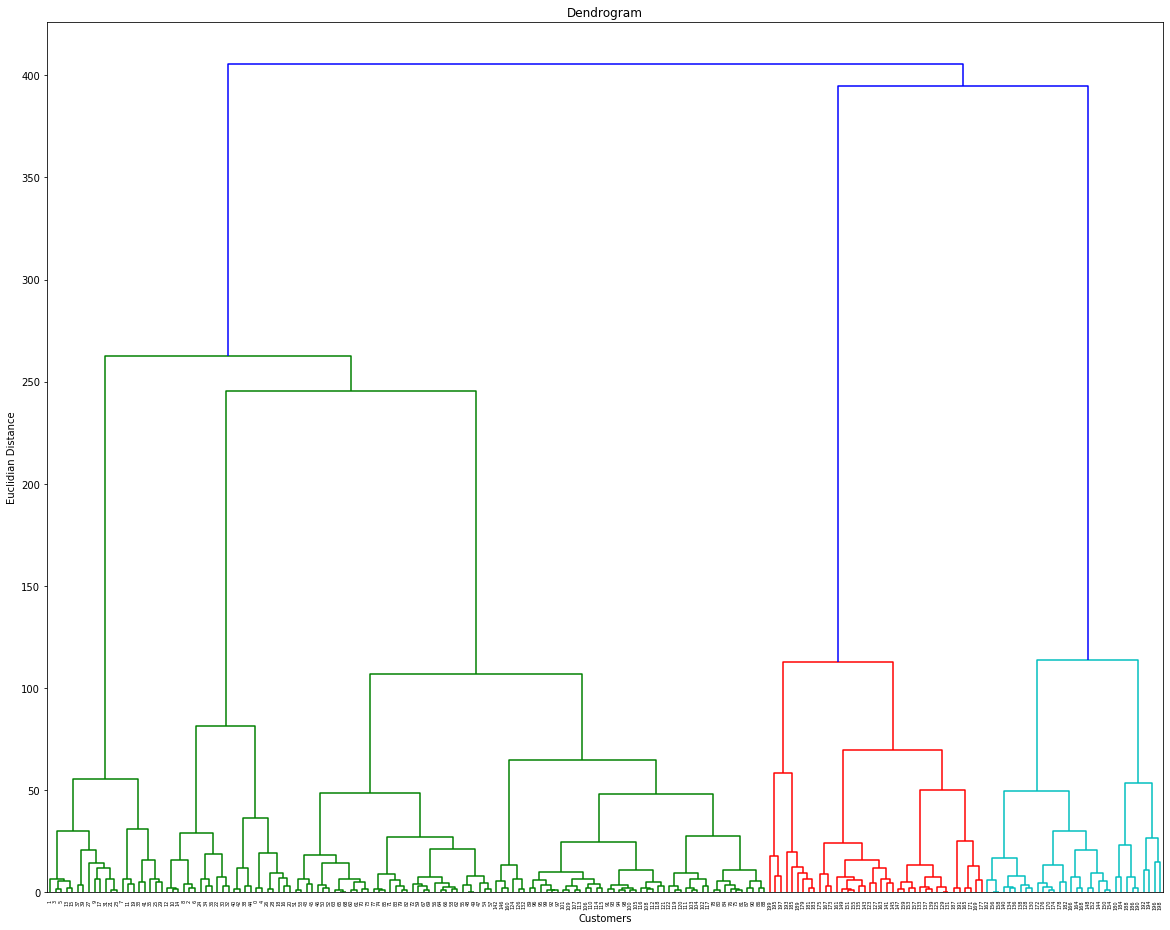

In [9]:
# As we used a for loop and calculated the wcss for each number of cluster to find the optimal cluster size in kmeans
# here we make use of dendrograms to find the optimal cluster size 

import scipy.cluster.hierarchy as sch
plt.figure(figsize=(20,16))
dendrogram = sch.dendrogram(sch.linkage(X , method = 'ward'))

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidian Distance')

As the blue line is the vertical line with longest vertical distance we have 5 clusters which is same as that in kmeans

In [12]:
# Fitting the model

from sklearn.cluster import AgglomerativeClustering
#Agglomerative stands for bottom up approach 

hc = AgglomerativeClustering(n_clusters = 5 , affinity = 'euclidean' , linkage = 'ward')
# ward is similar to wcss only here it is used to reduce the variance

y_hc = hc.fit_predict(X)

In [13]:
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

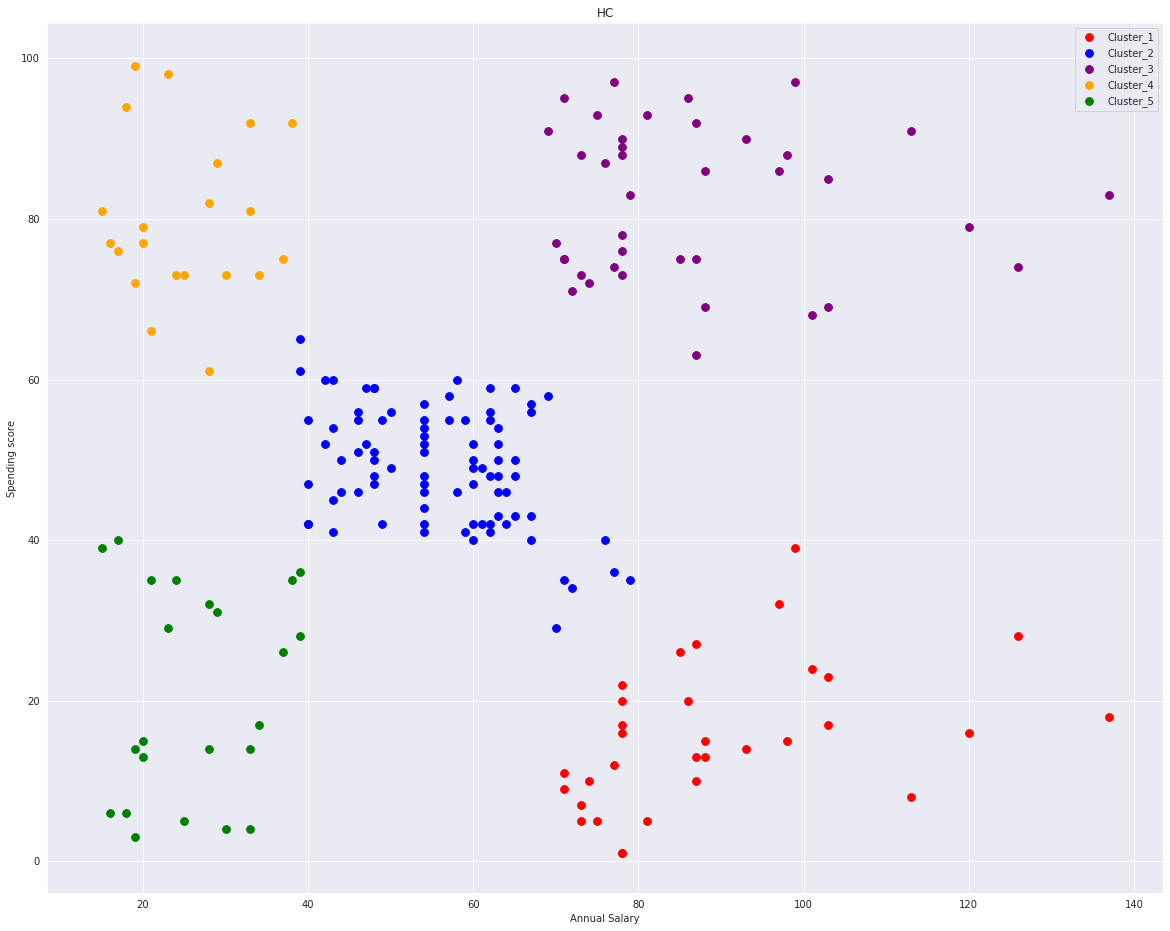

In [15]:
# Visualizing the HC

plt.figure(figsize=(20,16))
sns.set_style(style='darkgrid')

plt.scatter(X[y_hc == 0,0] , X[y_hc == 0 ,1] , s = 60 , c = 'red' , label = 'Cluster_1')
plt.scatter(X[y_hc == 1,0] , X[y_hc == 1 ,1] , s = 60 , c = 'blue' , label = 'Cluster_2')
plt.scatter(X[y_hc == 2,0] , X[y_hc == 2 ,1] , s = 60 , c = 'purple' , label = 'Cluster_3')
plt.scatter(X[y_hc == 3,0] , X[y_hc == 3 ,1] , s = 60 , c = 'orange' , label = 'Cluster_4')
plt.scatter(X[y_hc == 4,0] , X[y_hc == 4 ,1] , s = 60 , c = 'green' , label = 'Cluster_5')

plt.title('HC')
plt.xlabel('Annual Salary')
plt.ylabel('Spending score')
plt.legend()